In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

new section

In [4]:
data = pd.read_csv('NFLX.csv', date_parser=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [6]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [8]:
data.count()

Date         1009
Open         1009
High         1009
Low          1009
Close        1009
Adj Close    1009
Volume       1009
dtype: int64

<ipython-input-9-433c637dfcba>:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  data.rolling(window=30).mean()['Close'].plot()


<Axes: >

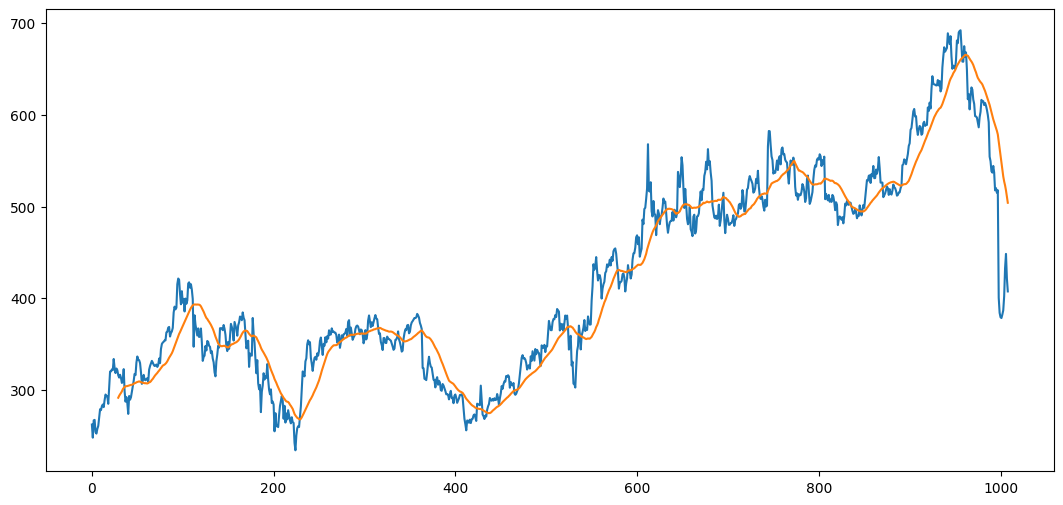

In [9]:
data['Open'].plot(figsize=(13,6)) 
data.rolling(window=30).mean()['Close'].plot()
     

<Axes: >

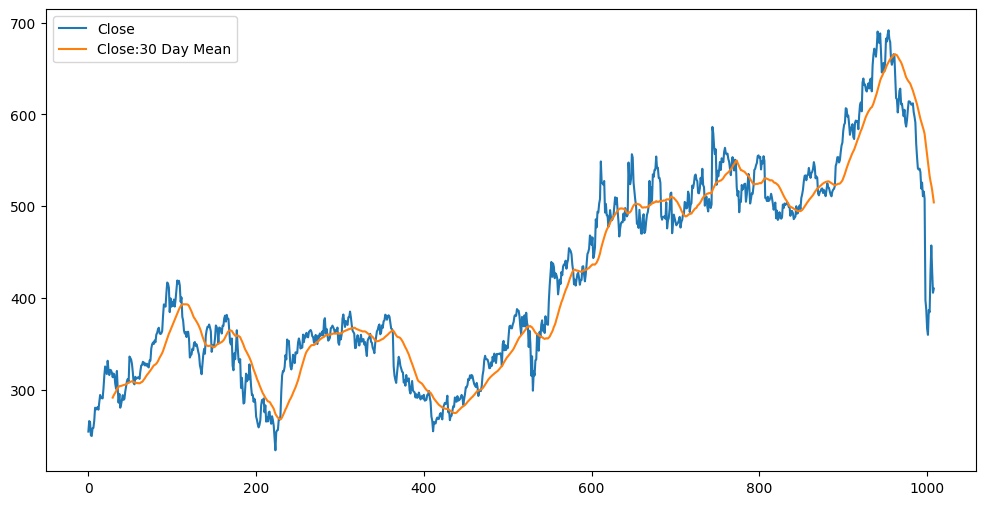

In [10]:
data['Close:30 Day Mean']=data['Close'].rolling(window=30).mean()
data[['Close','Close:30 Day Mean']].plot(figsize=(12,6))

<Axes: >

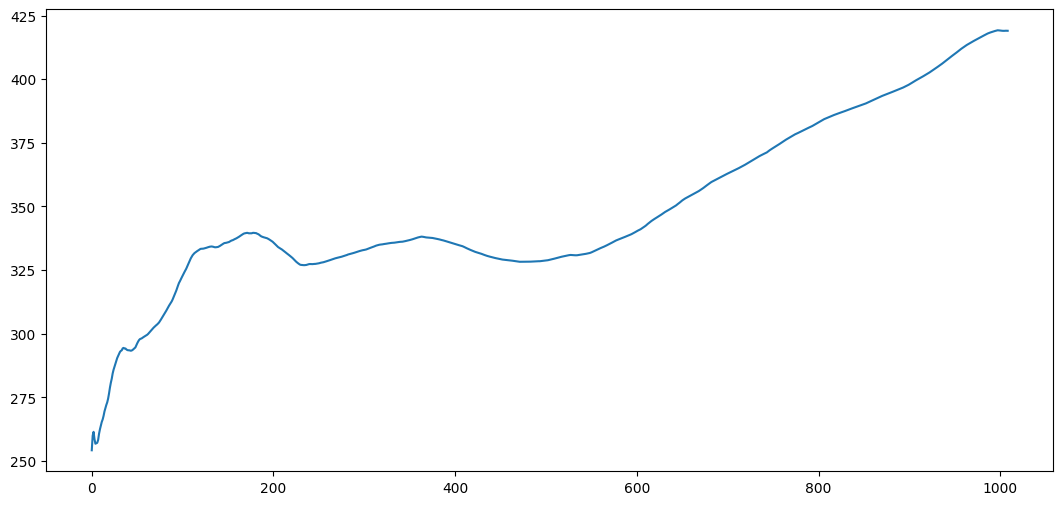

In [11]:
data['Close'].expanding(min_periods=1).mean().plot(figsize=(13,6))


In [12]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [13]:
print(scaled_data)

[[0.04451626]
 [0.06954849]
 [0.06701469]
 ...
 [0.4272515 ]
 [0.37509011]
 [0.38507243]]


In [14]:
training_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[:training_data_len, :]
test_data = scaled_data[training_data_len:, :]

In [15]:
training_data_len

807

In [16]:
train_data

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       [0.03542955],
       [0.03405342],
       [0.05257641],
       [0.05327534],
       [0.0701601 ],
       [0.10133021],
       [0.09750767],
       [0.09757319],
       [0.10301218],
       [0.09667768],
       [0.11369343],
       [0.13167034],
       [0.12391599],
       [0.12559796],
       [0.12343551],
       [0.14672022],
       [0.1771914 ],
       [0.19951508],
       [0.19064677],
       [0.18156003],
       [0.2131015 ],
       [0.19095254],
       [0.17911361],
       [0.19149862],
       [0.19049385],
       [0.18472731],
       [0.17387127],
       [0.18265218],
       [0.18042421],
       [0.15906164],
       [0.14647998],
       [0.18887749],
       [0.1459339 ],
       [0.11334393],
       [0.13426968],
       [0.10137394],
       [0.10875693],
       [0.12026823],
       [0.13125532],
       [0.12007165],
       [0.12243068],
       [0.14021101],
       [0.15244317],
       [0.16463161],
       [0.169

In [17]:
test_data

array([[0.60072954],
       [0.60046743],
       [0.59341208],
       [0.60378756],
       [0.59341208],
       [0.59553087],
       [0.60094798],
       [0.6107118 ],
       [0.60118823],
       [0.58823527],
       [0.57272664],
       [0.58030621],
       [0.58967692],
       [0.55221598],
       [0.57054233],
       [0.54848083],
       [0.55215046],
       [0.56680717],
       [0.55713068],
       [0.55132041],
       [0.55442216],
       [0.584937  ],
       [0.57668031],
       [0.58762367],
       [0.58421614],
       [0.58644412],
       [0.58972059],
       [0.58742709],
       [0.57927958],
       [0.57962907],
       [0.55820098],
       [0.56979967],
       [0.56962496],
       [0.56466659],
       [0.55029378],
       [0.55348285],
       [0.55675932],
       [0.58104893],
       [0.56359623],
       [0.56471025],
       [0.57766321],
       [0.58297107],
       [0.57473624],
       [0.60055482],
       [0.60911729],
       [0.62073785],
       [0.64041852],
       [0.653

In [18]:
training_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[:training_data_len, :]
test_data = scaled_data[training_data_len:, :]

In [19]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [20]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [21]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
model.fit(X_train, y_train, epochs=1, batch_size=1, verbose=2)

746/746 - 33s - loss: 0.0051 - 33s/epoch - 44ms/step


In [23]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


5/5 [==============================] - 3s 41ms/step


<ipython-input-27-77fd105f28ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = None


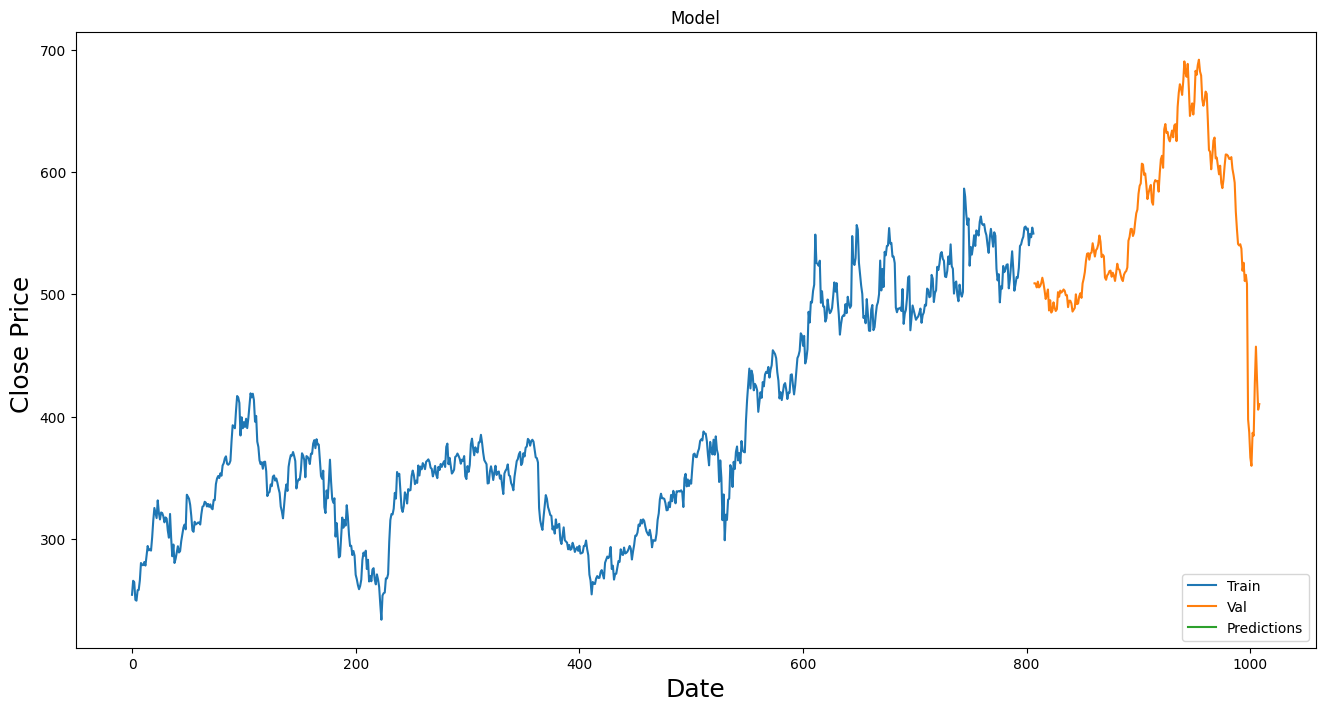

In [27]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = None
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()